# Exercises week 38

## September 15-19

## Resampling and the Bias-Variance Trade-off


### Learning goals

After completing these exercises, you will know how to

- Derive expectation and variances values related to linear regression
- Compute expectation and variances values related to linear regression
- Compute and evaluate the trade-off between bias and variance of a model

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include

- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)


## Use the books!

This week deals with various mean values and variances in linear regression methods (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)).

For more discussions on Ridge regression and calculation of expectation values, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.

The exercises this week are also a part of project 1 and can be reused in the theory part of the project.

### Definitions

We assume that there exists a continuous function $f(\boldsymbol{x})$ and a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$ which describes our data


$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$


We further assume that this continous function can be modeled with a linear model $\mathbf{\tilde{y}}$ of some features $\mathbf{X}$.


$$
\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}
$$


We therefore get that our data $\boldsymbol{y}$ has an expectation value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$, that is $\boldsymbol{y}$ follows a normal distribution with mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.


## Exercise 1: Expectation values for ordinary least squares expressions


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ show that


$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \boldsymbol{\beta}.
$$


We have that 
$$
    \mathbb{E}(\hat{\beta_{OLS}})=\mathbb{E}((X^TX)^{-1}X^Ty)
$$
$$
    =(X^TX)^{-1}X^T\mathbb{E}(y)
$$
$$
    =(X^TX)^{-1}X^TX\beta
$$
$$
=\beta.
$$

**b)** Show that the variance of $\boldsymbol{\hat{\beta}_{OLS}}$ is


$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$


We have that 
$$
\textbf{Var}(\hat{\beta_{OLS}})=\textbf{Var}((X^TX)^{-1}X^Ty)\\
=||(X^TX)^{-1}X^T||^2\textbf{Var}(y)\\
=((X^TX)^{-1}X^T)((X^TX)^{-1}X^T)^T\sigma^2\\
=((X^TX)^{-1}X^T)(X((X^TX)^{-1})^T)\sigma^2\\
=(X^TX)^{-1}(X^TX)((X^TX)^{T})^{-1}\sigma^2\\
=(X^TX)^{-1}\sigma^2.
$$

We can use the last expression when we define a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the parameters $\boldsymbol{\hat{\beta}_{OLS}}$.
A given parameter ${\boldsymbol{\hat{\beta}_{OLS}}}_j$ is given by the diagonal matrix element of the above matrix.


## Exercise 2: Expectation values for Ridge regression


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ show that


$$
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}
$$


We see that $\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big] \not= \mathbb{E} \big[\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}\big ]$ for any $\lambda > 0$.


Similarily as for OLS we have that 
$$
    \mathbb{E}(\hat{\beta}_{Ridge})=\mathbb{E}((X^TX+\lambda I_{pp})^{-1}X^Ty)\\
    =(X^TX+\lambda I_{pp})^{-1}X^T\mathbb{E}(y)\\
    =(X^TX+\lambda I_{pp})^{-1}(X^TX)\beta.
$$

**b)** Show that the variance is


$$
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T}\mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}
$$


Similarily as for OLS we have that
$$
\textbf{Var}(\hat{\beta_{OLS}})=\textbf{Var}((X^TX+\lambda I_{pp})^{-1}X^Ty)\\
=||(X^TX+\lambda I_{pp})^{-1}X^T||^2\textbf{Var}(y)\\
=((X^TX+\lambda I_{pp})^{-1}X^T)((X^TX+\lambda I_{pp})^{-1}X^T)^T\sigma\\
=\sigma (X^TX+\lambda I_{pp})^{-1}X^TX((X^TX+\lambda I_{pp})^{-1})^T.
$$

We see that if the parameter $\lambda$ goes to infinity then the variance of the Ridge parameters $\boldsymbol{\beta}$ goes to zero.


## Exercise 3: Deriving the expression for the Bias-Variance Trade-off


The aim of this exercise is to derive the equations for the bias-variance tradeoff to be used in project 1.

The parameters $\boldsymbol{\hat{\beta}_{OLS}}$ are found by optimizing the mean squared error via the so-called cost function


$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$


**a)** Show that you can rewrite this into an expression which contains

- the variance of the model (the variance term)
- the expected deviation of the mean of the model from the true data (the bias term)
- the variance of the noise

In other words, show that:


$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$


with


$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$


and


$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

In order to arrive at the equation for the bias, we have to approximate the unknown function $f$ with the output/target values $y$.


We have that 
$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[\boldsymbol{y}^2-2\boldsymbol{\tilde{y}}\boldsymbol{y}+\boldsymbol{\tilde{y}}^2\right]
$$
$$
=\mathbb{E}\left[(X\beta+\epsilon)^2-2\boldsymbol{\tilde{y}}(X\beta+\epsilon)+\boldsymbol{\tilde{y}}^2\right]
$$
$$
=\mathbb{E}\left[(X\beta)^2+2\epsilon(X\beta)+\epsilon^2-2\boldsymbol{\tilde{y}}X\beta+2\boldsymbol{\tilde{y}}\epsilon+\boldsymbol{\tilde{y}}^2\right]
$$
$$
=\mathbb{E}\left[(X\beta-\boldsymbol{\tilde{y}})^2\right]+2\mathbb{E}\left[\epsilon(X\beta-\boldsymbol{\tilde{y}})\right]+\mathbb{E}[\epsilon^2]
$$
$$
=\mathbb{E}\left[((X\beta-\mathbb{E}[\boldsymbol{\tilde{y}}])+(\mathbb{E}[\boldsymbol{\tilde{y}}]-\boldsymbol{\tilde{y}}))^2\right]+\sigma^2
$$
$$
=\mathbb{E}\left[(X\beta-\mathbb{E}[\boldsymbol{\tilde{y}}])^2+2(X\beta-\mathbb{E}[\boldsymbol{\tilde{y}}])(\mathbb{E}[\boldsymbol{\tilde{y}}]-\boldsymbol{\tilde{y}})+ (\mathbb{E}[\boldsymbol{\tilde{y}}]-\boldsymbol{\tilde{y}})^2\right]+\sigma^2
$$
$$
=\mathbb{E}\left[(X\beta-\mathbb{E}[\boldsymbol{\tilde{y}}])^2+2(X\beta-\mathbb{E}[\boldsymbol{\tilde{y}}])(\mathbb{E}[\boldsymbol{\tilde{y}}]-\boldsymbol{\tilde{y}})\right]+ 
\mathbb{E}\left[(\mathbb{E}[\boldsymbol{\tilde{y}}]-\boldsymbol{\tilde{y}})^2\right]+\sigma^2
$$
$$
=\mathbb{E}\left[(X\beta-\mathbb{E}[\boldsymbol{\tilde{y}}])^2\right]+ 
\mathbb{E}\left[(\mathbb{E}[\boldsymbol{\tilde{y}}]-\boldsymbol{\tilde{y}})^2\right]+\sigma^2
$$

**b)** Explain what the terms mean and discuss their interpretations.


The bias term is the expected shift of our predictions from the true value. This can be interpreted as by how much our vaues miss the target (or alternativly, are shifted from the target $y$).$\\$
The variance term tells us the expected distance between points and the expectation of our predictions. It can be interpreted as the spread of the predictions.$\\$
The last term, the $\sigma^2$ is just the variance of the noise.$\\$
So all in all, this tells us that the mean squared error is just the shift of the predictions from the real target, plus the spread, plus the spread of the noise. Which really makes sense, since there are two ways the predictions could miss the actual value, by being shifted or by being spread out. But if all points are bunched up close to the real value, the only thing contributing to the error is the spread of the noise. 

## Exercise 4: Computing the Bias and Variance


Before you compute the bias and variance of a real model for different complexities, let's for now assume that you have sampled predictions and targets for a single model complexity using bootstrap resampling.

**a)** Using the expression above, compute the mean squared error, bias and variance of the given data. Check that the sum of the bias and variance correctly gives (approximately) the mean squared error.


In [56]:
import numpy as np

n = 1000
bootstraps = 1000

#predictions = np.random.rand(bootstraps, n) * 10 + 10
predictions = np.random.normal(loc=3, scale=0.1, size=(bootstraps, n))

# The definition of targets has been updated, and was wrong earlier in the week.
targets = np.random.rand(1, n)

mse = np.average(np.pow(targets - predictions, 2))
bias = np.average(np.pow(targets - np.average(predictions), 2))
variance = np.average(np.pow(predictions - np.average(predictions), 2))
print(bias, " ", variance)

6.316157026687853   0.01000311050865257


**b)** Change the prediction values in some way to increase the bias while decreasing the variance.

**c)** Change the prediction values in some way to increase the variance while decreasing the bias.


Answer b)$\\$
By increasing the shift of predicitons, one will increase the bias while keeping the variance unchanged $\\$
Answer c)$\\$
By increasing the scale of predictions, one will increase the variance while the bias is the same

**d)** Perform a bias-variance analysis of a polynomial OLS model fit to a one-dimensional function by computing and plotting the bias and variances values as a function of the polynomial degree of your model.


In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import normalize
from tqdm import tqdm

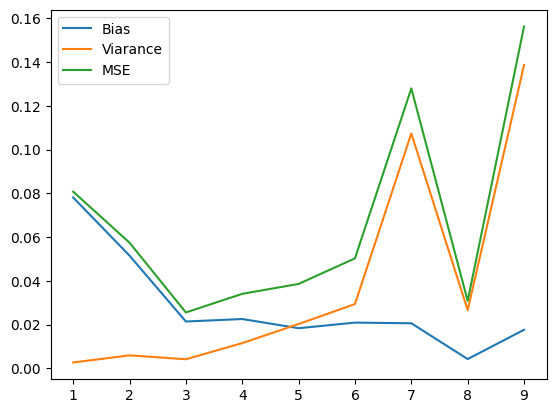

In [133]:
n = 100
bootstraps = 1000

x = np.linspace(-3, 3, n)
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)

biases = []
variances = []
mses = []

def OLS_parameters(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

splitratio = 0.5

targets = np.ndarray((bootstraps, int(n*splitratio)))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = splitratio)
for b in range(bootstraps): targets[b, :] = y_test
for p in range(1, 10):
    predictions = np.ndarray((bootstraps, int(n*(1-splitratio))))

    X_train = normalize(x_train[:, None] ** np.arange(0, p+1), axis=0, norm='max')
    X_test = normalize(x_test[:, None] ** np.arange(0, p+1), axis=0, norm='max')
     
    for b in range(bootstraps):
        X_train_re, y_train_re = resample(X_train, y_train)

        # fit your model on the sampled data

        beta = OLS_parameters(X_train_re, y_train_re)

        # make predictions on the test data
        predictions[b, :] = X_test @ beta

    mse = np.average(np.pow(targets - predictions, 2))
    bias = np.average(np.pow(targets - np.average(predictions, axis=0), 2))
    variance = np.average(np.pow(predictions - np.average(predictions, axis=0), 2))
    biases.append(bias)
    variances.append(variance)
    mses.append(mse)

plt.plot(range(1, 10), biases, label="Bias")
plt.plot(range(1, 10), variances, label="Viarance")
plt.plot(range(1, 10), mses, label="MSE")
plt.legend()
plt.show()

**e)** Discuss the bias-variance trade-off as function of your model complexity (the degree of the polynomial).

**f)** Compute and discuss the bias and variance as function of the number of data points (choose a suitable polynomial degree to show something interesting).


Answer e)$\\$
As the degree of the polynomial increases the bias goes down, since our predictions get closer and closer to the real target, in theory with an "infinit-dimensional" polynomial, we could perfectly fit any data, but then the variance would skyrocket, since all predctions would be far from the expected value or average. 

100%|██████████| 6/6 [00:02<00:00,  2.64it/s]


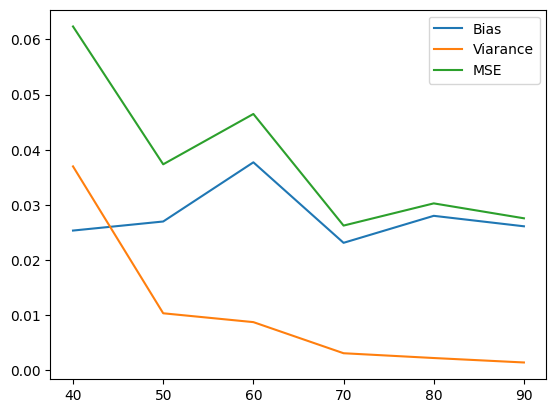

In [134]:
nMax = 100
bootstraps = 1000

biases = []
variances = []
mses = []

def OLS_parameters(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

splitratio = 0.5

p = 3
n_range = range(40, nMax, 10)
for n in tqdm(n_range):
    targets = np.ndarray((bootstraps, int(n*splitratio)))
    x = np.linspace(-3, 3, n)
    y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = splitratio)
    for b in range(bootstraps): targets[b, :] = y_test

    predictions = np.ndarray((bootstraps, int(n*(1-splitratio))))
    

    X_train = normalize(x_train[:, None] ** np.arange(0, p+1), axis=0, norm='max')
    X_test = normalize(x_test[:, None] ** np.arange(0, p+1), axis=0, norm='max')
     
    for b in range(bootstraps):
        X_train_re, y_train_re = resample(X_train, y_train)

        # fit your model on the sampled data

        beta = OLS_parameters(X_train_re, y_train_re)

        # make predictions on the test data
        predictions[b, :] = X_test @ beta

    mse = np.average(np.pow(targets - predictions, 2))
    bias = np.average(np.pow(targets - np.average(predictions, axis=0), 2))
    variance = np.average(np.pow(predictions - np.average(predictions, axis=0), 2))
    biases.append(bias)
    variances.append(variance)
    mses.append(mse)

plt.plot(n_range, biases, label="Bias")
plt.plot(n_range, variances, label="Viarance")
plt.plot(n_range, mses, label="MSE")
plt.legend()
plt.show()

## Exercise 5: Interpretation of scaling and metrics


In this course, we often ask you to scale data and compute various metrics. Although these practices are "standard" in the field, we will require you to demonstrate an understanding of _why_ you need to scale data and use these metrics. Both so that you can make better arguements about your results, and so that you will hopefully make fewer mistakes.

First, a few reminders: In this course you should always scale the columns of the feature matrix, and sometimes scale the target data, when it is worth the effort. By scaling, we mean subtracting the mean and dividing by the standard deviation, though there are many other ways to scale data. When scaling either the feature matrix or the target data, the intercept becomes a bit harder to implement and understand, so take care.

Briefly answer the following:

**a)** Why do we scale data?

I would persume there are two main resons to scale data. Firstly every feature gets the same scale, so they are "even" menaing no single feature gets to dominate everything. Secondly working with small numbers is a lot nicer that large integers, since these can sometimes blow up to "infinity" and we get an overflow (or NaN) error. 

**b)** Why does the OLS method give practically equivelent models on scaled and unscaled data?

In OLS the way the parameteres of the model are calculated and the feature matrix will cancel out any scaling, hence the models are equal. Said in a different way, if you scale one parameter, then you are just "streching" the line along one axis, but "streching" a line still makes it the same line, hence no practial change in the model (you have just changed the units of meassure). 

**c)** Why does the Ridge method **not** give practically equivelent models on scaled and unscaled data? Why do we only consider the model on scaled data correct?

In Ridge large features are penalized more, so scaling a model will adjust the penalty and hence change that features contribution to the model. This will actually change the model, not just "strech" it. $\\$
In Ridge we are adding a small value to the terms, if the terms aren't scaled, this little addition won't change the model substantially. Hence we need to scale the data in order to be able to choose the correct values for $\lambda$. Additionally each features should be penaliced "equally". For this to occure they all need to be withing the same range of values, if not, the features that happen to be on a larger scale will be penalized more and hence contribute less to the acctual model. 

**d)** Why do we say that the Ridge method gives a biased model?

This bias commes from the term we add to our feature matrix. It shifts the entire model by a small amount and hence makes it biased. 

**e)** Is the MSE of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

Scaling the feature matrix won't affect the MSE since scaled, and not scaled data gives prectically the same model as discussed in **c**. Scaling the target data will scale the MSE since now predictions and input are changed relative to each other. So the target has moved to a different meassure and hence the error will change accordingly. 

**f)** Read about the R2 score, a metric we will ask you to use a lot later in the course. Is the R2 score of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

R2 is invariant to scaling of both feature matrix and target data scaling. This is due to R2 representing relative error, i.e. scale invariant error. 

**g)** Give interpretations of the following R2 scores: 0, 0.5, 1.

$R^2=0$ means zero corrolation between the variables. $R^2=0.5$ means some corrolation between the variables. $R^2=1$ means perfect corrolation between the variables.  

**h)** What is an advantage of the R2 score over the MSE?

R2 is scaleinvariant and hence can be usefull when dealing with data on different scales or where you want to know the "general" error and not the error for specific units of meassure. 
